# ИССЛЕДОВАНИЕ СПЕКТРАЛЬНОЙ ПЛОТНОСТИ МОЩНОСТИ МОДУЛИРОВАННЫХ СИГНАЛОВ
### Шаповалов Иван РЛ1-83

__Цель работы__ – изучение спектральной плотности мощности модулированных сигналов.

__Задачи работы__ – ознакомление с теоретическим материалом по данным методическим указаниям, выполнение работы в указанном порядке, углубление практических навыков в результате проведения математических экспериментов


_вариант 16_

| N | Схема модулятора                          |
|----|------------------------------------------|
| 8 | ФМ-4, ФМ-4 со сдвигом со сглаживанием, АМ |


In [1]:


import numpy as np                  # подключение библиотеки работы с массивами
from numpy.fft import fft, fftshift # подключение библиотеки цифровой обработки сигналов
import matplotlib.pyplot as plt     # подключение библиотеки представления данных
from scipy import constants as const
from math import sin, cos, pi, sqrt

# Четырехкратная фазовая модуляция (ФМ-4)

__Формирование сигнала ФН-4__

In [2]:

# функция возвращающая телеграфный сигнал с заданной амплитудой h
def get_telegraph_signal(h = 1.0, seed = 1):
    # генерация тысяча отсчетов равномерно распределенных чисел [0,1)
    data = np.random.default_rng(seed).random(1000)
    # преобразование отсчетов 
    symOne = 1*(data >= 0.5)
    symZero = -1*(data < 0.5)
    # результат, двумерный массив:значения и номера символов
    return (h*(symOne + symZero), range(len(data))) 

In [3]:
x1,numbers1 = get_telegraph_signal(1, 2023 + 16)  # генерация символов случайной последовательности
x2,numbers2 = get_telegraph_signal(1, 2023 + 15)  # генерация символов случайной последовательности

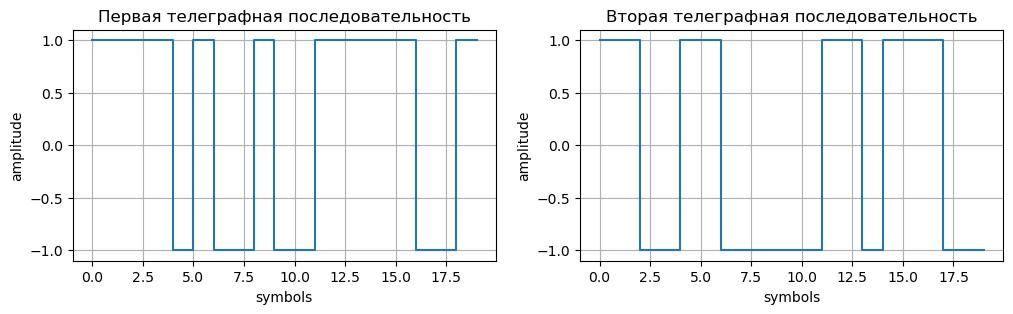

In [59]:
fig1,ax1 = plt.subplots(1, 2, figsize = (12, 3))    # создание окна и области для рисования (ax)

ax1[0].step(numbers1[:20], x1[:20], where='post')  # отображение 20 первых символов
ax1[0].set_xlabel('symbols')                     # подписи для осей графика
ax1[0].set_ylabel('amplitude')
ax1[0].grid()
ax1[0].set_title("Первая телеграфная последовательность")

ax1[1].step(numbers2[:20], x2[:20], where='post')  # отображение 20 первых символов
ax1[1].set_xlabel('symbols')                     # подписи для осей графика
ax1[1].set_ylabel('amplitude')
ax1[1].set_title("Вторая телеграфная последовательность")
ax1[1].grid()

In [5]:
f = 555        # несущая частота
fs = 10*f      # частот дискретизации сигнала
dt = 1/fs       # шаг дискретизации сигнала
n = 5           # число периодов на длительности символа T
T = n/f        # длительность одного символа из 5 полных периодов
print('symbol duration is %.2f'%(T),'s')
ns = int(fs*T)  # число отсчетов на один символ передаваемого сообщения
print('number of samples per symbol is ',ns)

symbol duration is 0.01 s
number of samples per symbol is  50


Text(0.5, 1.0, 'Вторая растянутая телеграфная последовательность')

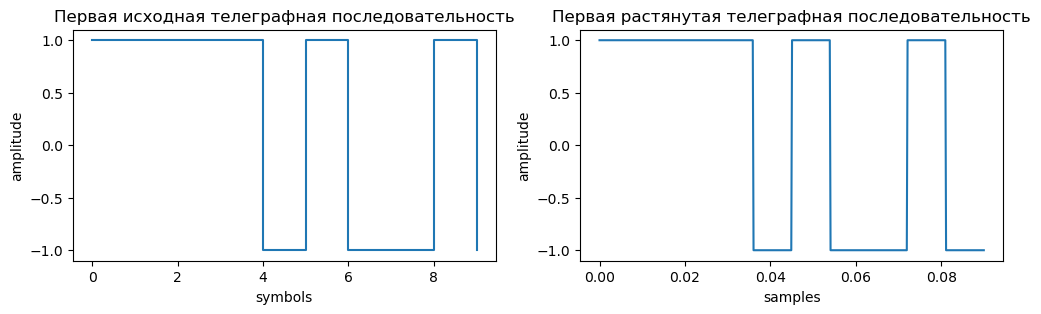

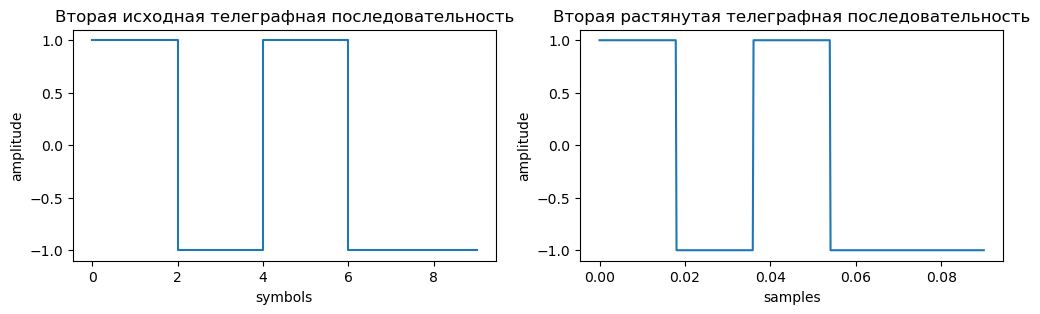

In [61]:
s1 = np.array([np.ones(ns)*i for i in x1]) # "растяжение" одного символа во времени
s1 = np.reshape(s1, -1)                    # трансформация в 1d массив
t = np.arange(0, dt*len(s1), dt)         # шкала времени полученных отсчетов


s2 = np.array([np.ones(ns)*i for i in x2]) # "растяжение" одного символа во времени
s2 = np.reshape(s2, -1)                    # трансформация в 1d массив


fig,ax2 = plt.subplots(1, 2, figsize=(12, 3))
ax2[0].step(numbers1[:10], x1[:10], where='post') # отображение символов
ax2[0].set_xlabel('symbols')                    # подписи для осей графика
ax2[0].set_ylabel('amplitude')
ax2[0].set_title("Первая исходная телеграфная последовательность")

ax2[1].plot(t[:500], s1[:500])                   # отображение отсчетов
ax2[1].set_xlabel('samples')                    # подписи для осей графика
ax2[1].set_ylabel('amplitude')
ax2[1].set_title("Первая растянутая телеграфная последовательность")

fig,ax2 = plt.subplots(1, 2, figsize=(12, 3))
ax2[0].step(numbers2[:10], x2[:10], where='post') # отображение символов
ax2[0].set_xlabel('symbols')                    # подписи для осей графика
ax2[0].set_ylabel('amplitude')
ax2[0].set_title("Вторая исходная телеграфная последовательность")

ax2[1].plot(t[:500], s2[:500])                   # отображение отсчетов
ax2[1].set_xlabel('samples')                    # подписи для осей графика
ax2[1].set_ylabel('amplitude')
ax2[1].set_title("Вторая растянутая телеграфная последовательность")


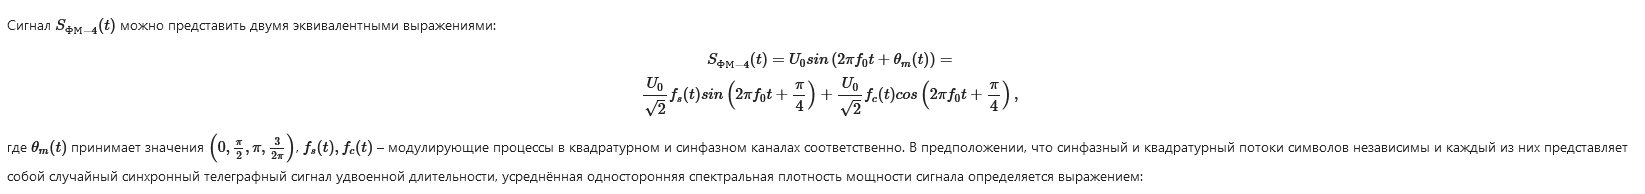

In [7]:
QPSK4_modulation = lambda f_s, f_c, t, u_0 = 1, f_0 = f: u_0/sqrt(2)*f_s*sin(2*const.pi*f_0*t + const.pi/4) + u_0/sqrt(2)*f_c*cos(2*const.pi*f_0*t + const.pi/4)

In [45]:
QPSK4_sig = [QPSK4_modulation(s1[i], s2[i], t[i]) for i in range(len(s1))]

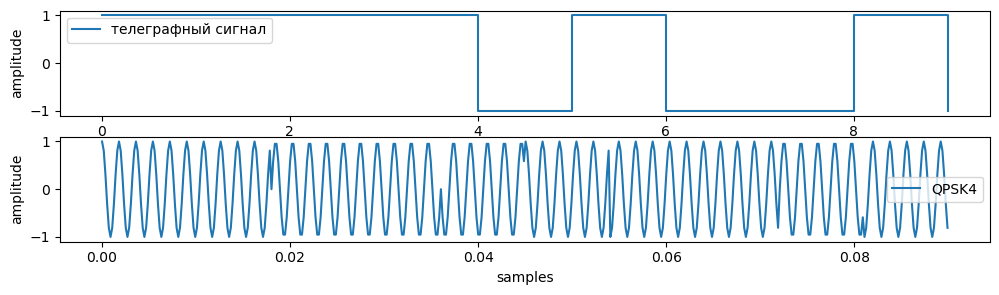

In [9]:
fig,ax2 = plt.subplots(2, 1, figsize=(12, 3))
ax2[0].step(numbers1[:10], x1[:10], where='post', label = 'телеграфный сигнал') # отображение символов
ax2[0].set_xlabel('symbols')                    # подписи для осей графика
ax2[0].set_ylabel('amplitude')
ax2[0].legend()

ax2[1].plot(t[:500], QPSK4_sig[:500], label = 'QPSK4')                   # отображение отсчетов
ax2[1].set_xlabel('samples')                    # подписи для осей графика
ax2[1].set_ylabel('amplitude')
ax2[1].legend()

__Корреляционная функция ФН-4__

In [49]:
def R(tau, T = T, h = 1):
    tselect = 1*(np.abs(tau) <= T)
    data = h**2*(1-abs(tau)/T)
    return  tselect * data

In [50]:
# теоретические  функции: корреляционная и спектральная плотность телеграфного сигнала

Rexp = 1/len(QPSK4_sig)*np.correlate(QPSK4_sig, QPSK4_sig, mode='full')     # экспериментальное определение КФ

fexp = np.linspace(-0.5*fs, 0.5*fs,len(Rexp))       # шкала частот к экспериментальному ПФ
texp = np.arange(-dt*(len(QPSK4_sig)-1), dt*len(QPSK4_sig), dt)     # шкала времени к результату вычисления КФ

fteor = np.linspace(-0.5*fs, 0.5*fs, len(Rexp))     # шкала частот
tteor = np.arange(-15*T, 15*T, step=dt)             # шкала времени для теоретической КФ

Gexp = np.fft.fft(Rexp)                             # преобразование Фурье от случайного сигнала
Gexp = np.abs(np.fft.fftshift(Gexp))                # центрируем результат БПФ и берем модул

Text(0.5, 1.0, 'Корреляционная функция \n телеграфного сигнала')

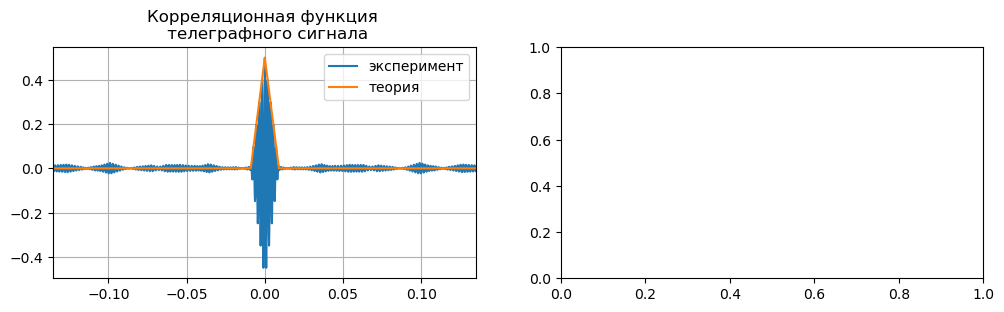

In [52]:
fig4,ax4 = plt.subplots(1, 2, figsize = (12,3))

ax4[0].plot(texp, Rexp, label='эксперимент')      # отображение КФ
ax4[0].plot(tteor, R(tteor)/2, label='теория')
ax4[0].set_xlim(-15*T,15*T)
ax4[0].grid()
ax4[0].legend()
ax4[0].set_title('Корреляционная функция \n телеграфного сигнала')

__Спектральная плотность мощьности ФН-4__


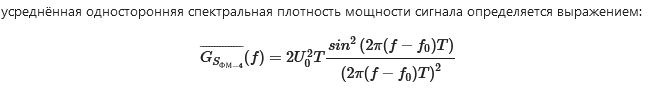

In [18]:
G_fm4 = lambda f, T = T, f_0 = f, U_0 = 1: 2*U_0**2*T*sin(2*const.pi*(f - f_0)*T)**2/(2*const.pi*(f - f_0)*T)**2

In [22]:
G_fm4_data = np.vectorize(G_fm4)(fexp)

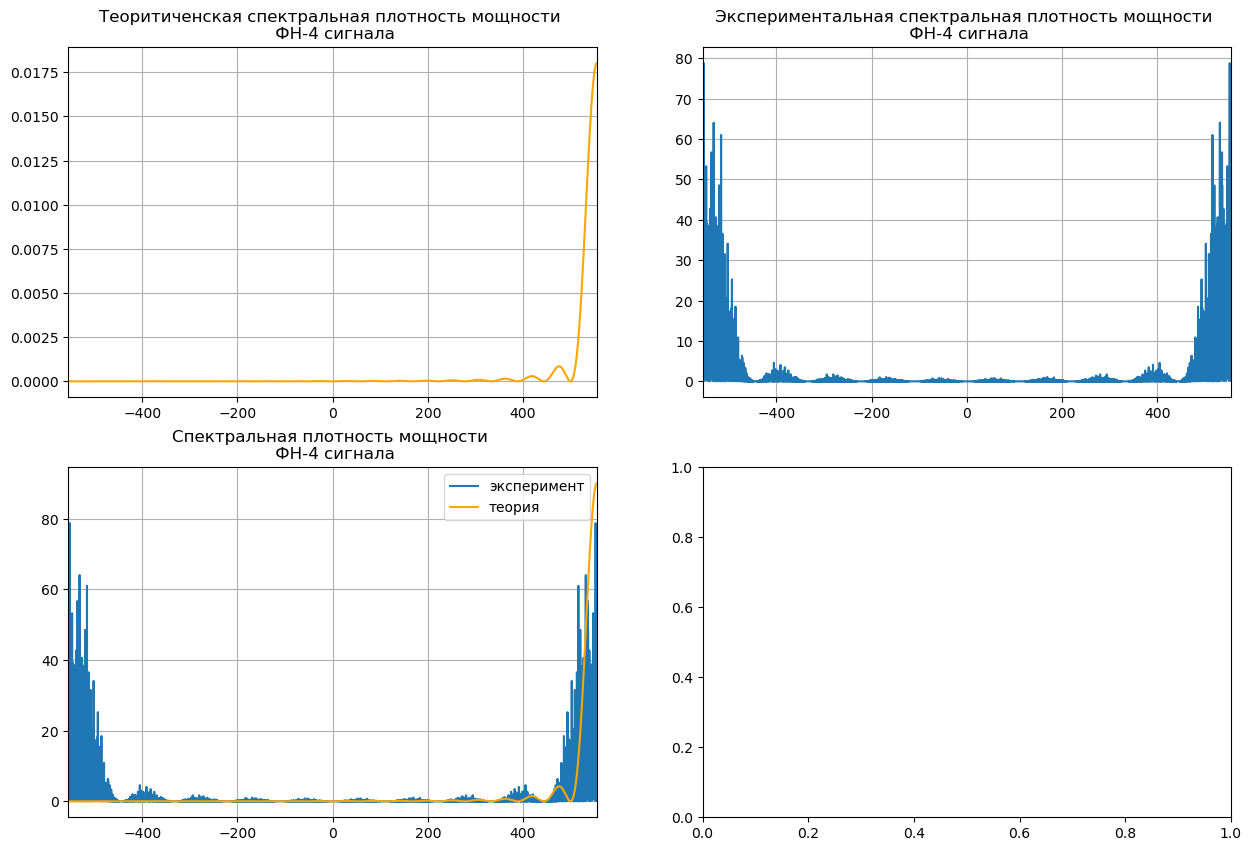

In [57]:

fig4,ax4 = plt.subplots(2, 2, figsize = (15,10))

# ax4[0].plot(texp, Rexp, label='эксперимент')      # отображение КФ
# ax4[0].plot(tteor, R(tteor,T), label='теория')
# ax4[0].set_xlim(-15*T,15*T)
# ax4[0].grid(), ax4[0].legend()
# ax4[0].set_title('Корреляционная функция \n телеграфного сигнала')


ax4[0,0].plot(fteor,G_fm4_data,label='теория', color = 'orange')
ax4[0,0].set_xlim(-1/dt/10,1/dt/10)
ax4[0,0].set_title('Теоритиченская спектральная плотность мощности \n ФН-4 сигнала')
ax4[0,0].grid()
# ax4[0,0].legend()

ax4[0,1].plot(fexp, Gexp, label='эксперимент')        # отображение спектра
ax4[0,1].set_xlim(-1/dt/10,1/dt/10)
ax4[0,1].set_title('Экспериментальная спектральная плотность мощности \n ФН-4 сигнала')
ax4[0,1].grid()
# ax4[0,1].legend()

ax4[1,0].plot(fexp, Gexp, label='эксперимент')        # отображение спектра
ax4[1,0].plot(fteor,(len(fteor)/2*G_fm4_data)/10,label='теория', color = 'orange')
ax4[1,0].set_xlim(-1/dt/10,1/dt/10)
ax4[1,0].set_title('Спектральная плотность мощности \n ФН-4 сигнала')
ax4[1,0].grid()
ax4[1,0].legend()

# ФМ-4 со сдвигом со сглаживанием

# Амплитудно-манипулированный сигнал (АМ сигнал)

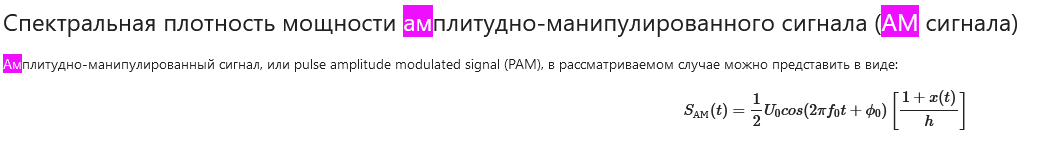

In [14]:
# функция возвращающая телеграфный сигнал с заданной амплитудой h
def PAM_modulation(U_0 = 1.0, seed = 1):
    # генерация тысяча отсчетов равномерно распределенных чисел [0,1)
    data = np.random.default_rng(seed).random(1000)
    # преобразование отсчетов 
    S_am = 1/2*U_0*cos(2*const.pi*f_0*t + )
    # результат, двумерный массив:значения и номера символов
    return (h*(symOne + symZero), range(len(data))) 
